In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import esutil, scipy
sys.path.append('../')
from xd import *

from utils import *
from cmass_modules import io, Cuts
%matplotlib inline
%load_ext autoreload
%autoreload 2


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#import corner

import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
#from plot_chain import plot_single, plot_triple #, calling_public_planck_chains

#from chainconsumer import ChainConsumer


HF = lambda Nr,Nbin: (Nr-Nbin-2) *1./(Nr-1)
HFactor = HF(100, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# color scheme
dmass_color = '#FF5733'
cmass_sgc_color = '#006ED5'
cmass_full_color = 'black'

In [9]:
from numpy.linalg import inv
def chisqr( d1, d2, cov ):
    diffv = d1 - d2
    chi2= np.dot(diffv, np.dot(inv(cov), diffv.T) )
    return chi2

In [10]:
def clean_gold(gold_st82):
    from run_DMASS import priorCut_test
    gold_st82 = gold_st82[gold_st82['MODEST_CLASS'] == 1]
    gold_st82 = Cuts.keepGoodRegion(gold_st82)
    mask_y1a1 = (gold_st82['FLAGS_GOLD'] == 0 )&(priorCut_test(gold_st82))
    gold_st82 = gold_st82[mask_y1a1]
    return gold_st82

In [11]:
rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
inputdir = rootdir
figoutdir = inputdir+'/figure/'
sysoutdir = inputdir+'/sys/'
wdir = sysoutdir+'/weights/'
basedir = rootdir+'/act/'
#os.system('mkdir '+inputdir)
#os.system('mkdir '+figoutdir)
#os.system('mkdir '+sysoutdir)
#os.system('mkdir '+wdir)
#os.system('cp ../data_txt/systematics/4th/systematic*_no_weight.txt '+inputdir+'/.')

In [6]:
cmass = esutil.io.read(rootdir + 'cmass_in_st82.fits')
train_sample = esutil.io.read(rootdir + 'train_sample_des.fits')
#cmass = esutil.io.read(rootdir + 'cmass_in_st82.fits')

# Anguar Clustering

In [68]:
cov_mocks = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov')
cov_mocks_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_656.cov')
cov_rescaled_mocks = np.genfromtxt('../data_txt/cmass/cov_rescaled_mocks_NG.txt')
print cov_rescaled_mocks.shape

(10, 10)


In [23]:
Nthetabin = 10

from su_utils import read_cov, imshowplot

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_cmass_sgc = read_cov( covfilename=cov_an_cmass_filename)[-10:, -10:]

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_cmass_ngc = read_cov( covfilename=cov_an_cmass_filename)[-10:, -10:]

cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
cov_an_dmass = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]

In [28]:
#meanr_sgc, xi_sgc, _ = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cmass_sgc_data = np.genfromtxt('../data_txt/cmass/npairs_cmass_sgc_bins10_binslop_05.txt')
meanr_sgc, _, _, xi_sgc, _, DD_sgc, RR_sgc, DR_sgc, npairs_sgc = [cmass_sgc_data[:,i] for i in range(9)]

#cov_cmass_s_1 = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
#fisher_cmass_s = HFactor * np.linalg.inv(cov_cmass_s_1)
#cov_cmass_s = np.linalg.inv(fisher_cmass_s)
cov_cmass_s = cov_an_cmass_sgc.copy() #cov_mocks.copy() #cov_an_cmass.copy()
xi_err_sgc = np.sqrt(cov_cmass_s.diagonal())


cmass_ngc_data1 = np.genfromtxt('../data_txt/cmass/npairs_cmass_ngc_bins10_binslop_05.txt')
meanr_ngc, _, _, xi_ngc, sigma_xi_ngc1, DD_ngc, RR_ngc, DR_ngc, npairs_ngc = [cmass_ngc_data1[:,i] for i in range(9)]
#meanr_ngc, xi_ngc, _ = np.loadtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.txt',unpack=True)
cov_cmass_n = cov_an_cmass_ngc.copy()  #cov_mocks_ngc.copy() #np.genfromtxt('../data_txt//acf_auto_cmass_ngc_sys_cp_nz_weight_nbin10_jk100.cov')* 1./HFactor
xi_err_ngc = np.sqrt(cov_cmass_n.diagonal())



#meanr_full, xi_full, _ = np.loadtxt('../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
#cov_cmass_full = np.genfromtxt('../data_txt//acf_auto_cmass_full_sys_cp_nz_weight_nbins10_jk100.cov')*1./HFactor

DD_full = DD_sgc + DD_ngc
DR_full = DR_sgc + DR_ngc
RR_full = RR_sgc + RR_ngc

meanr_full = meanr_ngc.copy()
xi_full = (DD_full - 2*DR_full + RR_full)*1./RR_full
cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
xi_err_full = np.sqrt(cov_cmass_full.diagonal())

#meanr_dmass, xi_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')* 1./HFactor

dmass_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt')
meanr_dmass, _, _, xi_dmass, _, _, _, _, _ = [dmass_data[:,i] for i in range(9)]
cov_dmass = cov_an_dmass.copy()# cov_rescaled_mocks.copy() #cov_an_dmass.copy()
xi_err_dmass = np.sqrt(cov_dmass.diagonal())

In [29]:
#cov_dmass = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.cov')* 1./HFactor
#meanr_dmass, xi_dmass, _ = np.genfromtxt(rootdir+'/act//acf_auto_dmass_all_weight_pcut01_nbins10_jk100.txt', unpack=True) 
cov = cov_cmass_s + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_sgc
chisqr = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between SGC and DMASS', chisqr, '/10'


cov = cov_cmass_n + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_ngc
chisqr_dn = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between NGC and DMASS', chisqr_dn, '/10'


cov = cov_cmass_s + cov_cmass_n
invcov = np.linalg.inv(cov)
datav = xi_sgc - xi_ngc
chisqr_sn = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between NGC and SGC', chisqr_sn, '/10'


cov = cov_cmass_full + cov_dmass
invcov = np.linalg.inv(cov)
datav = xi_dmass - xi_full
chisqr_df = np.dot(np.dot(datav, invcov), datav.T) 
print 'chisqr/dof between full and DMASS', chisqr_df, '/10'

chisqr/dof between SGC and DMASS 4.432979640567544 /10
chisqr/dof between NGC and DMASS 20.276762272195256 /10
chisqr/dof between NGC and SGC 24.080313027068176 /10
chisqr/dof between full and DMASS 12.609052437588785 /10


In [16]:
theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)

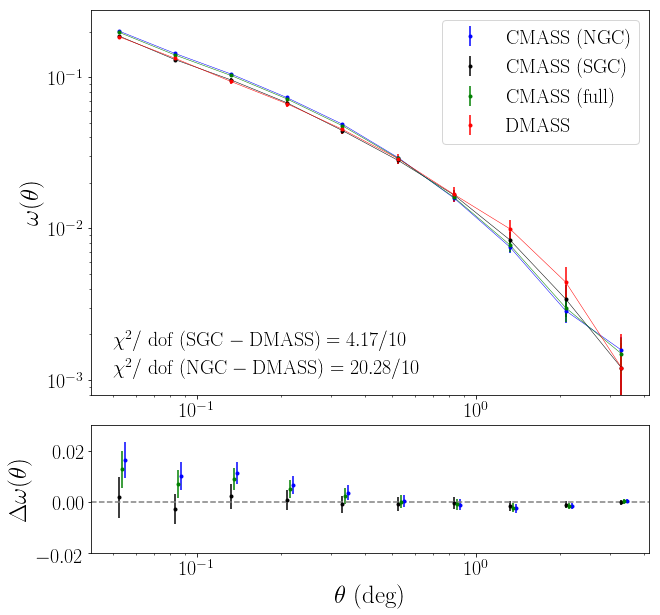

In [26]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[3, 1]})


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='b', label='dmass no weight')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
ax.errorbar(meanr_ngc, xi_ngc, yerr = xi_err_ngc, fmt = '.', color='b', label=r'${\rm CMASS~(NGC)}$')
ax.errorbar(meanr_sgc, xi_sgc, yerr = xi_err_sgc, fmt = '.', color='k', label=r'${\rm CMASS~(SGC)}$')
ax.errorbar(meanr_full, xi_full, yerr = xi_err_full, fmt = '.', color='g', label=r'${\rm CMASS~(full)}$')
ax.plot(meanr_sgc, xi_sgc, 'k-', lw=0.5)
ax.plot(meanr_ngc, xi_ngc, 'b-', lw=0.5)
ax.plot(meanr_full, xi_full, 'g-', lw=0.5)

#ax.errorbar(meanr4*0.95, xi4, yerr = xi_err4, fmt = '.', color='b', label='dmass no weight')
ax.errorbar(meanr_dmass, xi_dmass, yerr = xi_err_dmass, fmt = '.', color='r', label=r'${\rm DMASS}$')
ax.plot(meanr_dmass, xi_dmass, 'r-', lw=0.5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 20)

#ax.text(0.05, 0.0015, chisqr_label, fontsize = 15)
ax.text(0.05, 0.0017, r'$\chi^2/$ $\rm dof ~(SGC-DMASS) $ $= {:0.2f}/{}$'.format(chisqr, meanr_sgc.size), fontsize = 20)
ax.text(0.05, 0.0011, r'$\chi^2/$ $\rm dof ~(NGC-DMASS) $ $= {:0.2f}/{}$'.format(chisqr_dn, meanr_sgc.size), fontsize = 20)
#ax.text(0.05, 0.0005, r'$\chi^2/$ $\rm dof ~(SGC-NGC)   $ $= {:0.2f}/{}$'.format(chisqr_sn, meanr_sgc.size), fontsize = 15)
ax.set_ylim(8e-4,)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 25)
ax.tick_params(labelsize=20)

ax2.errorbar(meanr_dmass, xi_sgc-xi_dmass, yerr = np.sqrt(xi_err_sgc**2 + xi_err_dmass**2), fmt='.', color = 'k' )
ax2.errorbar(meanr_dmass*1.05, xi_ngc-xi_dmass, yerr = np.sqrt(xi_err_ngc**2 + xi_err_dmass**2), fmt='.', color = 'b' )
ax2.errorbar(meanr_dmass*1.025, xi_full-xi_dmass, yerr = np.sqrt(xi_err_full**2 + xi_err_dmass**2), fmt='.', color = 'g' )
ax2.axhline(y = 0, ls = '--', color='grey')
ax2.set_xscale('log')
ax2.set_xlim(2.5/60, 250./60)
ax2.set_ylim(-0.02, 0.03)
ax2.set_ylabel(r'$\Delta \omega (\theta) $', fontsize = 25)
ax2.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax2.tick_params(labelsize=20)


fig.subplots_adjust(hspace=0.12);

#fig.savefig('../paper_figure/acf_comparison_cmass_dmass-3.pdf')

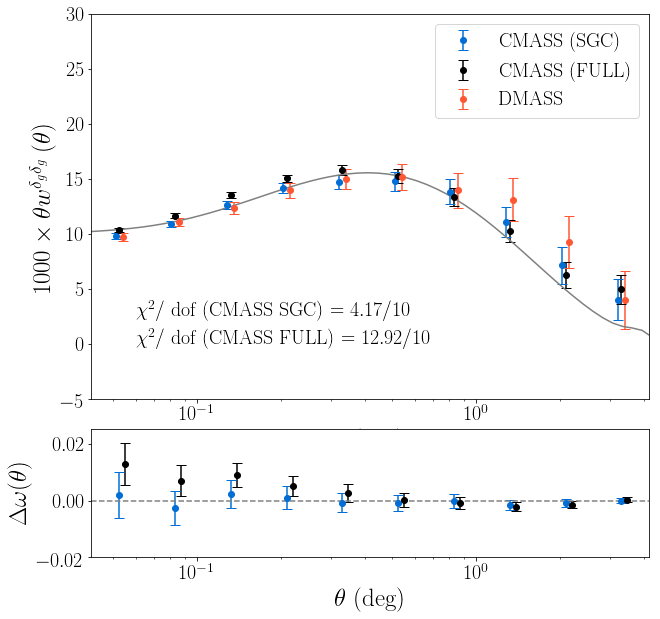

In [27]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[3, 1]})


#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='b', label='dmass no weight')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr_ngc, xi_ngc, yerr = xi_err_ngc, fmt = '.', color='b', label=r'${\rm CMASS~(NGC)}$')


ax.errorbar(meanr_sgc*0.97, 1000*meanr_sgc*xi_sgc, yerr = 1000*meanr_sgc*xi_err_sgc, fmt = 'o', capsize=5, color=cmass_sgc_color, label=r'${\rm CMASS~(SGC)}$')
ax.errorbar(meanr_full, 1000*meanr_sgc*xi_full, yerr = 1000*meanr_sgc*xi_err_full, fmt = 'o', capsize=5, color=cmass_full_color, label=r'${\rm CMASS~(FULL)}$')
ax.errorbar(meanr_dmass *1.03, 1000*meanr_sgc*xi_dmass, yerr = 1000*meanr_sgc*xi_err_dmass, fmt = 'o', capsize=5, color=dmass_color, label=r'${\rm DMASS}$')



#theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
#theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
#ax.plot(theta_th, 1000*theta_th*theory, color='grey' )
ax.plot(theta_th, 1000*theta_th*theory_sgc, color='grey' )

#ax.plot(meanr_sgc, xi_sgc, '-', color=cmass_sgc_color, lw=0.5)
#ax.plot(meanr_full, xi_full, '-', color=cmass_full_color, lw=0.5)
#ax.plot(meanr_dmass, xi_dmass, '-', color=dmass_color, lw=0.5)

#ax.errorbar(meanr4*0.95, xi4, yerr = xi_err4, fmt = '.', color='b', label='dmass no weight')
ax.set_ylim(-5, 30)
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)

#ax.text(0.05, 0.0015, chisqr_label, fontsize = 15)
ax.text(0.06, 2.5, r'$\chi^2/$ $\rm dof ~(CMASS~SGC) $ $= {:0.2f}/{}$'.format(chisqr, meanr_sgc.size), fontsize = 20)
ax.text(0.06, 0, r'$\chi^2/$ $\rm dof ~(CMASS~FULL) $ $= {:0.2f}/{}$'.format(chisqr_df, meanr_full.size), fontsize = 20)
#ax.text(0.05, 0.0005, r'$\chi^2/$ $\rm dof ~(SGC-NGC)   $ $= {:0.2f}/{}$'.format(chisqr_sn, meanr_sgc.size), fontsize = 15)
#ax.set_ylim(8e-4,)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax.set_ylabel(r'$1000 \times \theta w^{ \delta_{g} \delta_{g}} ~(\theta)$', fontsize = 25)
#ax.set_ylabel(r'$\omega(\theta)$', fontsize = 25)
ax.tick_params(labelsize=20)

ax2.errorbar(meanr_dmass, xi_sgc-xi_dmass, yerr = np.sqrt(xi_err_sgc**2 + xi_err_dmass**2), capsize=5,fmt='o', color = cmass_sgc_color )
#ax2.errorbar(meanr3*1.05, xi_ngc-xi3, yerr = np.sqrt(xi_err_ngc**2 + xi_err3**2), fmt='.', color = 'b' )
ax2.errorbar(meanr_full*1.05, xi_full-xi_dmass, yerr = np.sqrt(xi_err_full**2 + xi_err_dmass**2), capsize=5,fmt='o', color = cmass_full_color )
ax2.axhline(y = 0, ls = '--', color='grey')
ax2.set_xscale('log')
ax2.set_xlim(2.5/60, 250./60)
ax2.set_ylim(-0.02, 0.025)
ax2.set_ylabel(r'$\Delta \omega (\theta) $', fontsize = 25)
ax2.set_xlabel(r'$\theta$ ${\rm (deg)}$', fontsize = 25)
ax2.tick_params(labelsize=20)


fig.subplots_adjust(hspace=0.12);

#fig.savefig('../paper_figure/acf_comparison_cmass_dmass-5.pdf')